In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from deepomics import neuralnetwork as nn
from deepomics import utils, fit, visualize, saliency, metrics

import helper

np.random.seed(247)
tf.set_random_seed(247)

In [2]:
data_path = '../data/Synthetic_dataset.h5'
results_path = '../results'
params_path = utils.make_directory(results_path, 'model_params')

# load dataset
train, valid, test = helper.load_synthetic_dataset(data_path)

test_model = helper.load_synthetic_models(data_path, dataset='test')
    
# get data shapes
input_shape = list(train['inputs'].shape)
input_shape[0] = None
output_shape = [None, train['targets'].shape[1]]

loading training data
loading cross-validation data
loading test data


In [3]:
tf.reset_default_graph()

model_name = 'DistNet'
dropout_status = True
l2_status = True
bn_status = True
    
# load model parameters
model_layers, optimization, genome_model = helper.load_model(model_name, 
                                                             input_shape, 
                                                             dropout_status, 
                                                             l2_status, 
                                                             bn_status)

# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=True)

# compile neural trainers
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')
nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

# initialize session
sess = utils.initialize_session()

# load best parameters
nntrainer.set_best_parameters(sess)

activations = nntrainer.get_activations(sess, test, layer='output')

loading model from:  ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


INFO:tensorflow:Restoring parameters from ../results/model_params/LocalNet/LocalNet_do_l2_bn_best.ckpt


/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


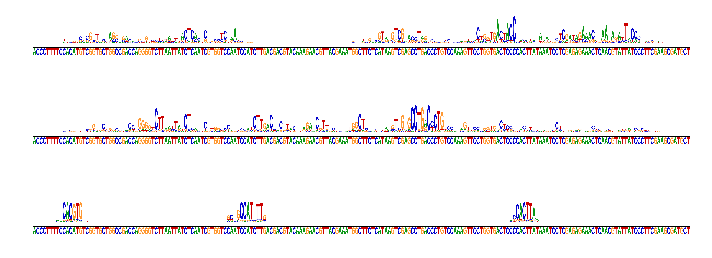

In [4]:

target = 0.9865 # 9865  9815

right_index = np.where(test['targets'][:,0]==1)[0]
index = right_index[np.argmin((activations[right_index] - target)**2)]

X = np.expand_dims(test['inputs'][index], axis=0)
X_model = test_model[index]


fig = plt.figure(figsize=(10,4))
plt.subplot(3,1,1)

model_name = 'LocalNet'
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')

# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }


guided_saliency = helper.backprop(X, layer='output', class_index=0, params=params, method='guided')
visualize.plot_seq_pos_saliency(np.squeeze(X).T, np.squeeze(guided_saliency[0]).T, alphabet='dna', nt_width=50, norm_factor=3)

plt.subplot(3,1,2)
model_name = 'DistNet'
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')

# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }


guided_saliency = helper.backprop(X, layer='output', class_index=0, params=params, method='guided')
visualize.plot_seq_pos_saliency(np.squeeze(X).T, np.squeeze(guided_saliency[0]).T, alphabet='dna', nt_width=50, norm_factor=3)


plt.subplot(3,1,3)
visualize.plot_seq_pos_saliency(np.squeeze(X).T, X_model, alphabet='dna', nt_width=50, norm_factor=3)

#output_name = str(index)+'_'+name+'_{:.2f}'.format(p[i]) + '_' + '{:.2f}'.format(y[i])
#outfile = os.path.join(plot_path, output_name+'.pdf')
#fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

In [5]:
tf.reset_default_graph()

model_name = 'DistNet'
dropout_status = True
l2_status = True
bn_status = True

# model save path
    
# load model parameters
model_layers, optimization, genome_model = helper.load_model(model_name, 
                                                             input_shape, 
                                                             dropout_status, 
                                                             l2_status, 
                                                             bn_status)
# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=True)

# compile neural trainers
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')
nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

# initialize session
sess = utils.initialize_session()

# load best parameters
nntrainer.set_best_parameters(sess)


loading model from:  ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


# Layer 1

INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_

/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


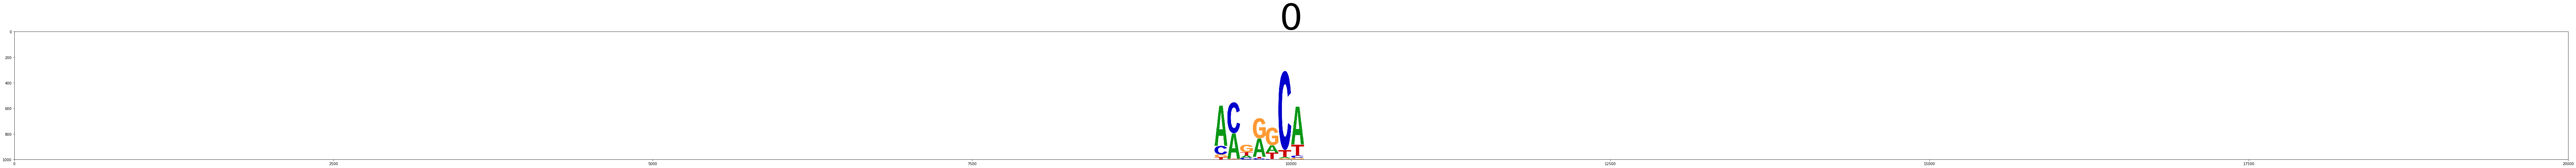

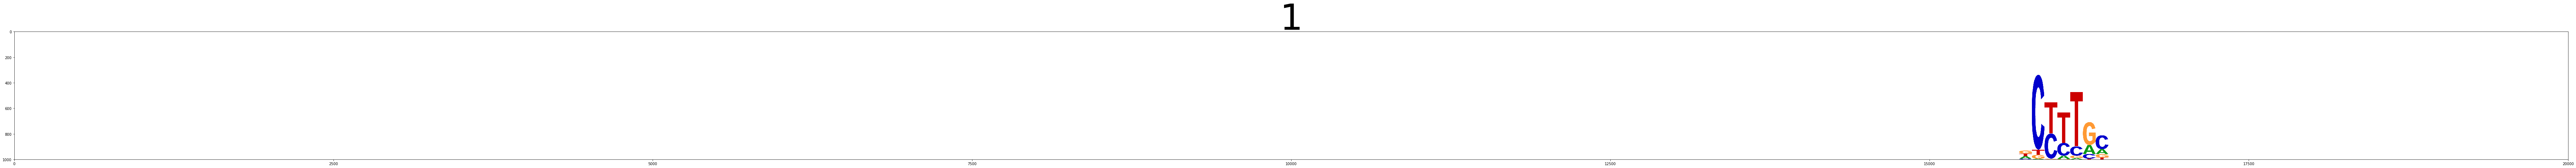

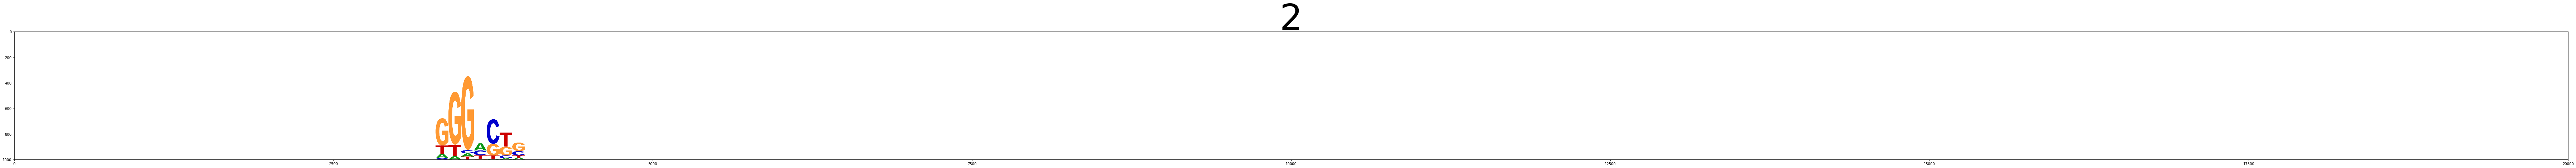

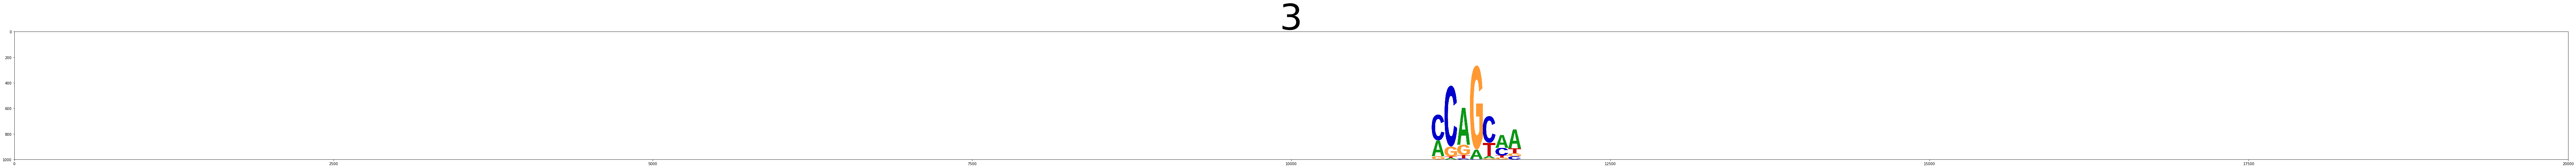

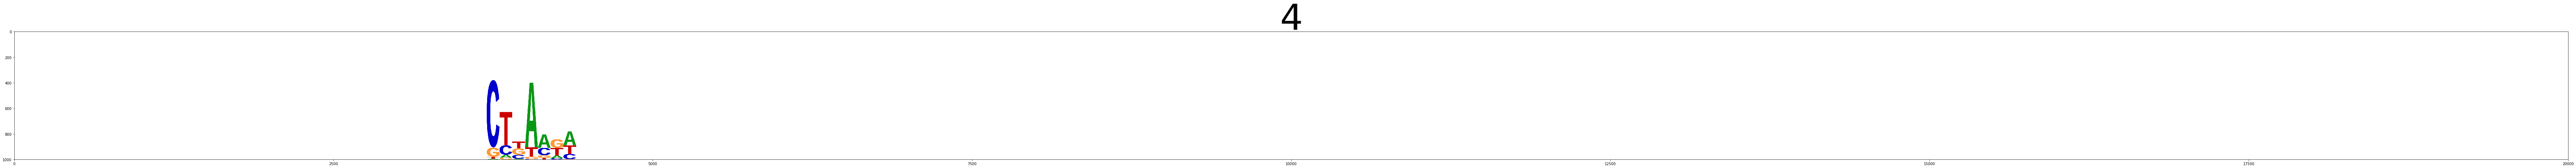

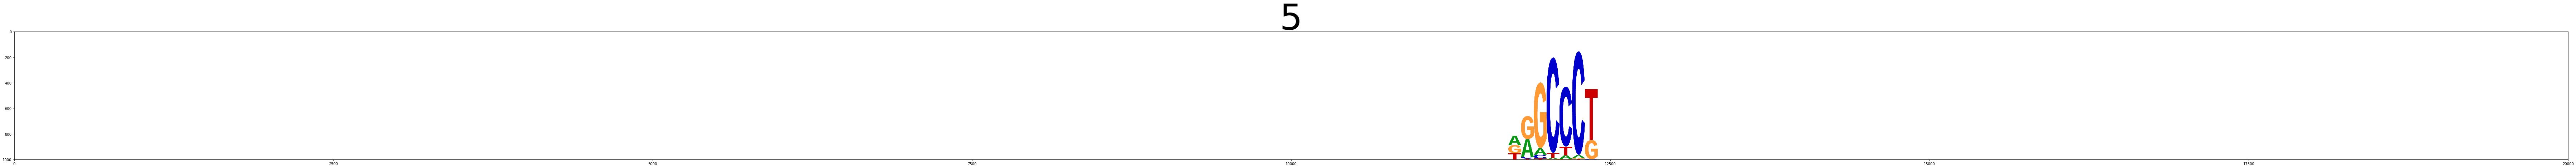

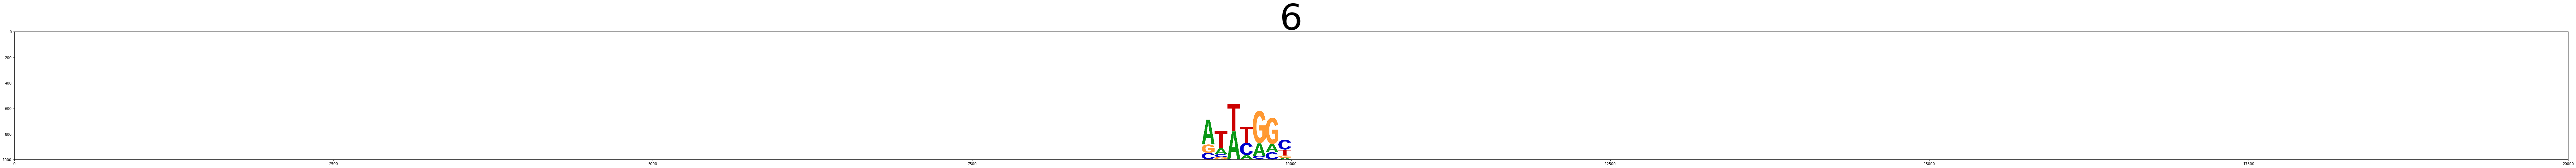

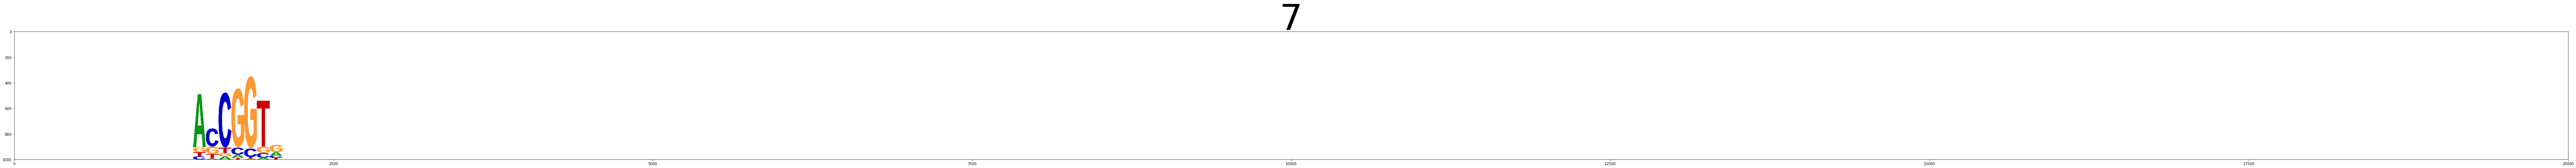

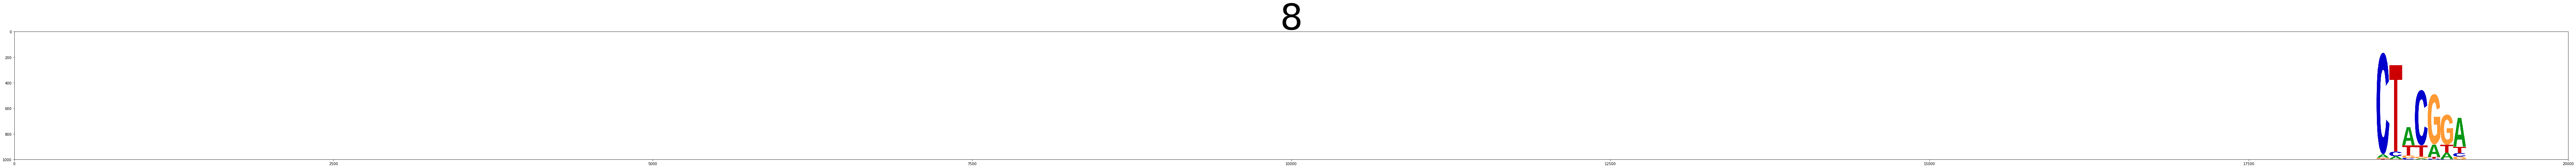

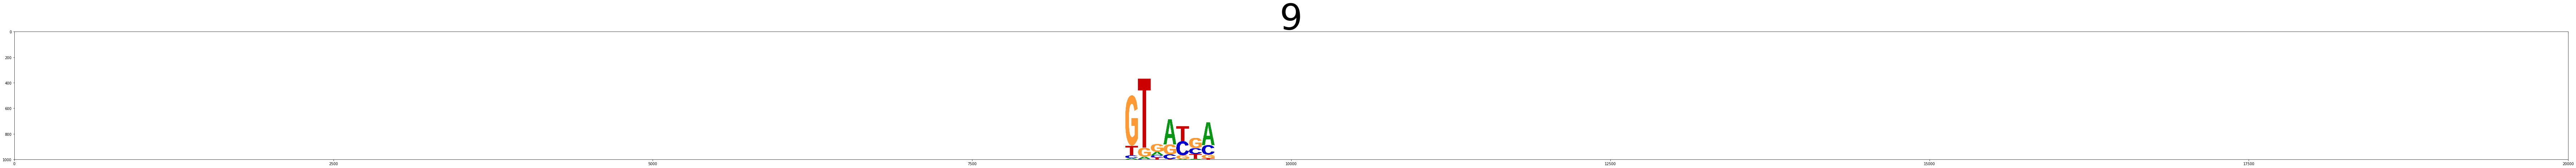

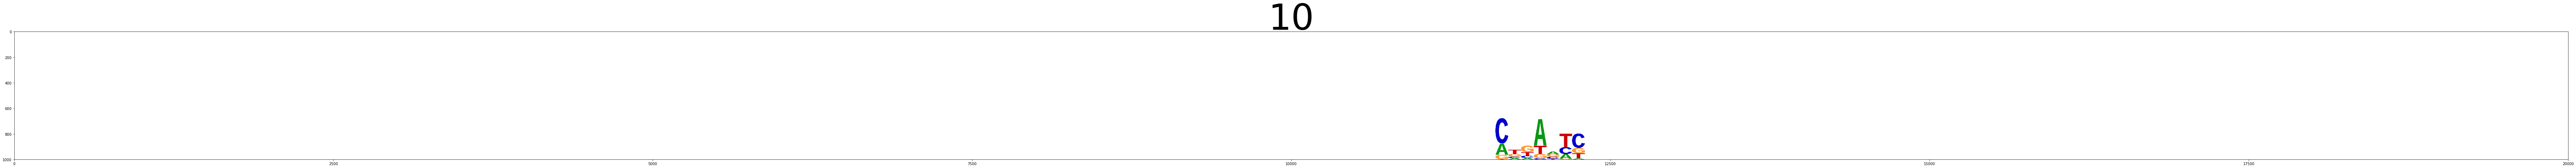

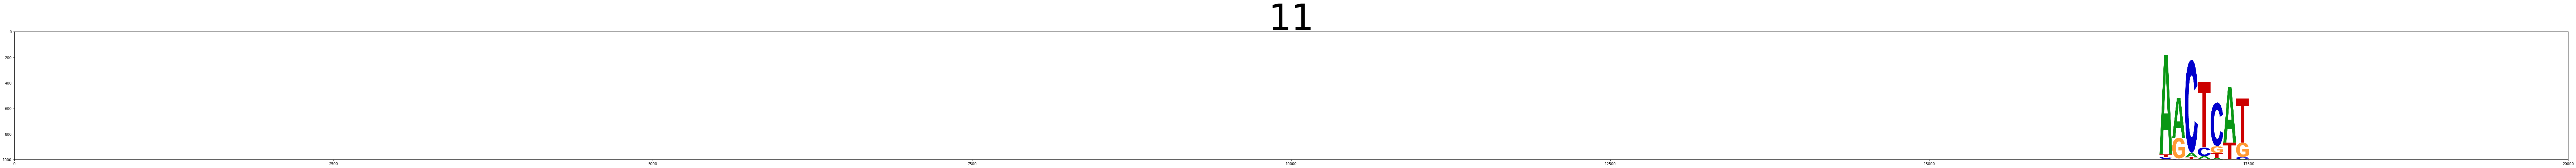

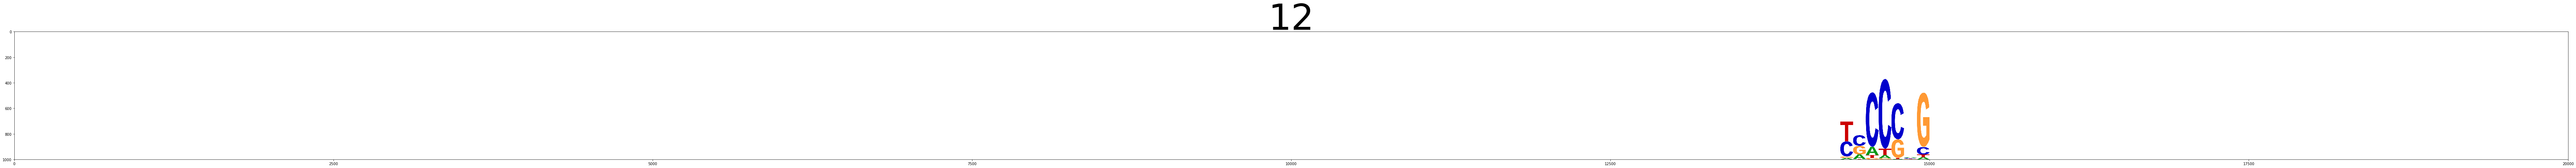

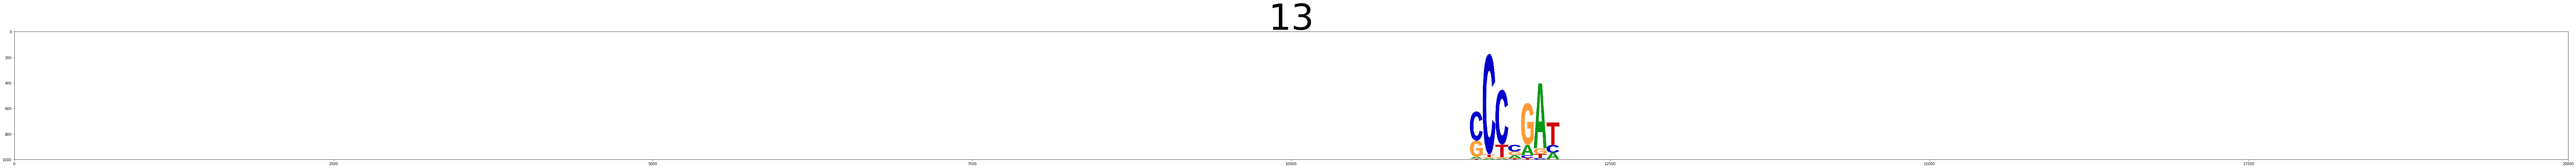

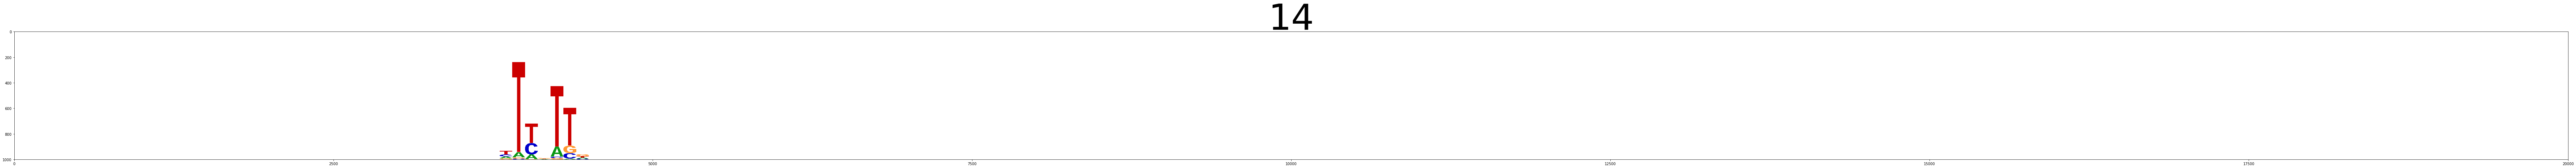

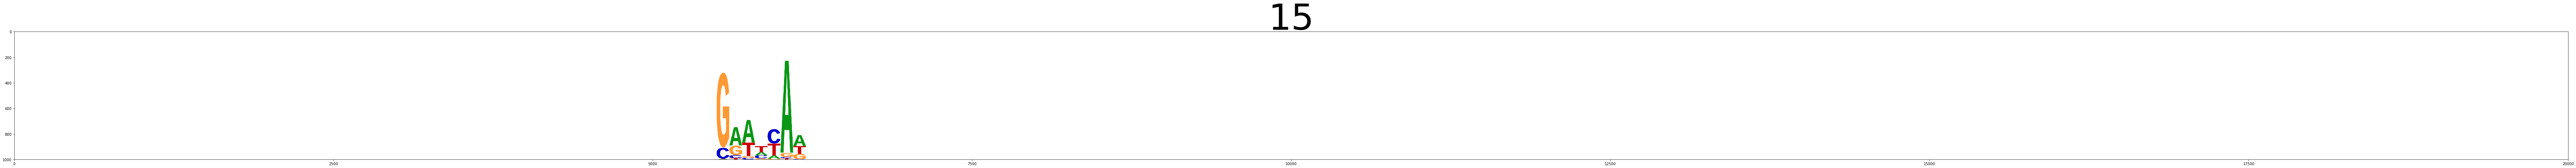

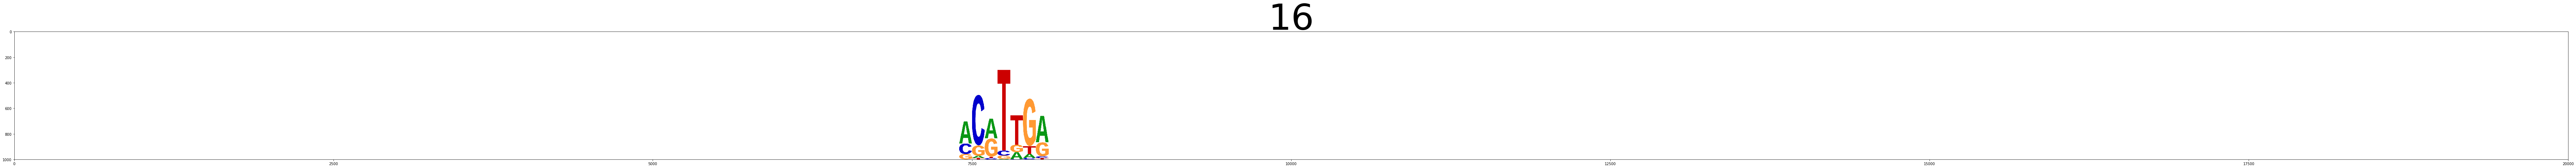

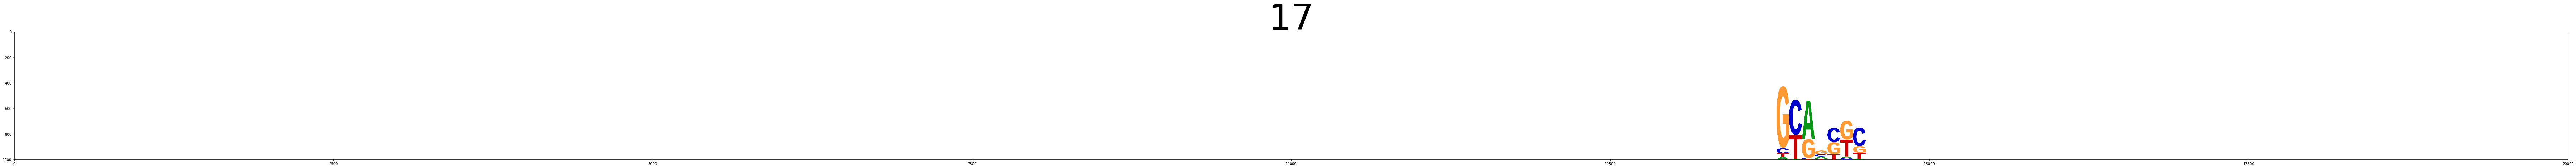

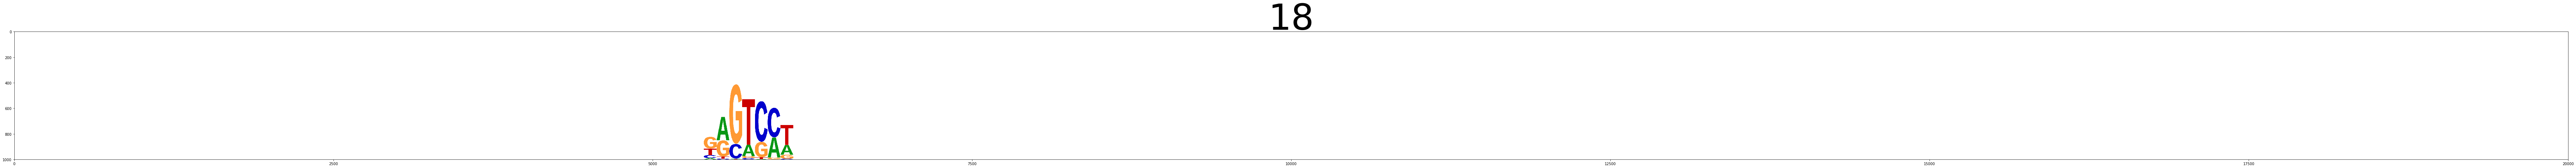

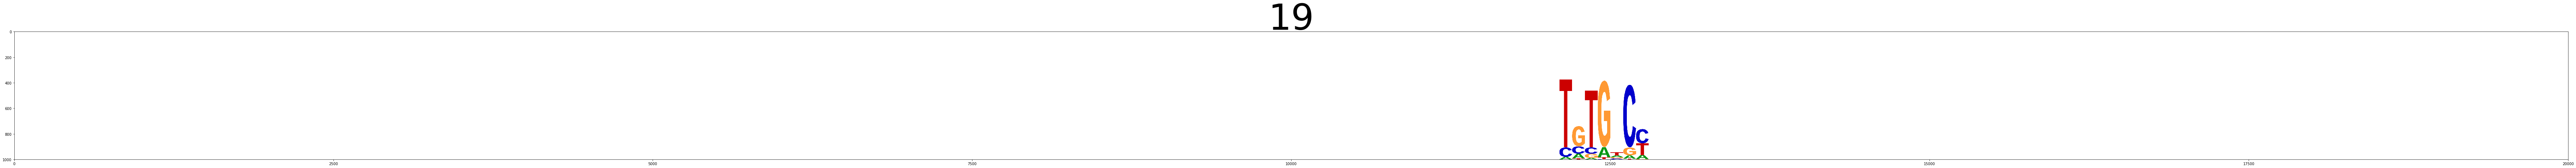

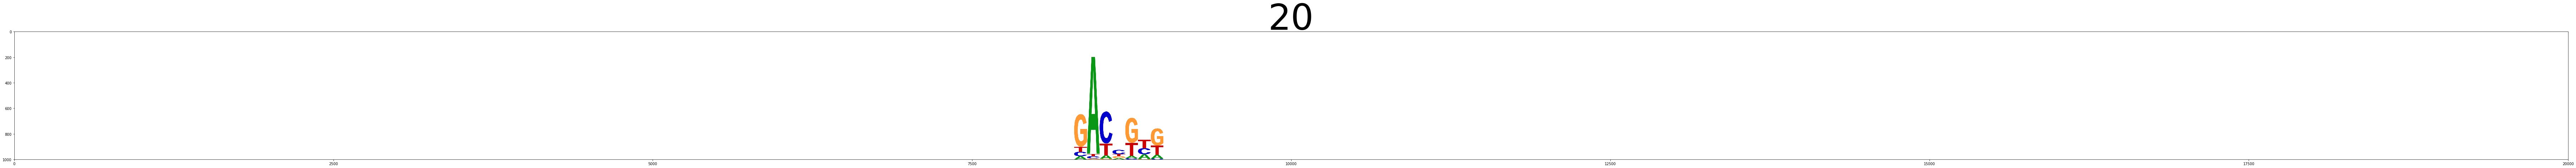

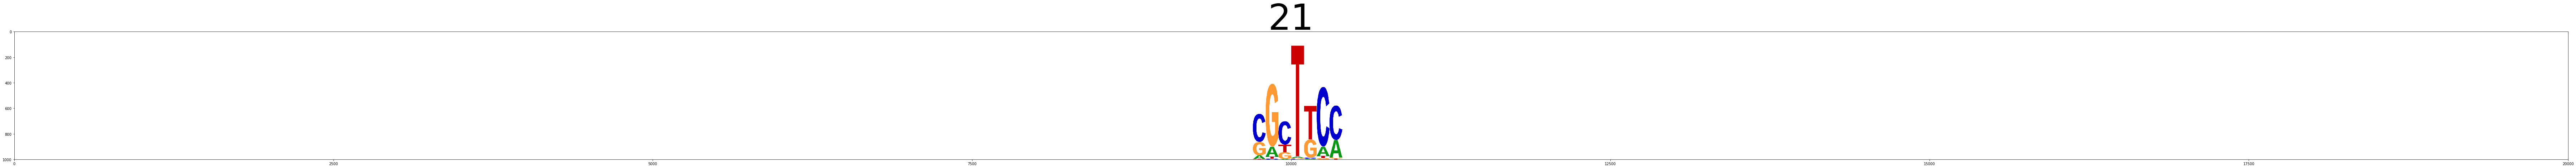

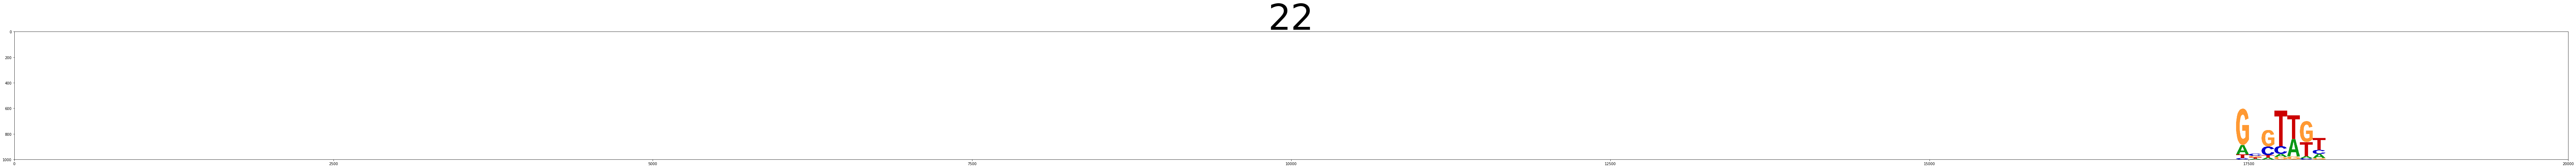

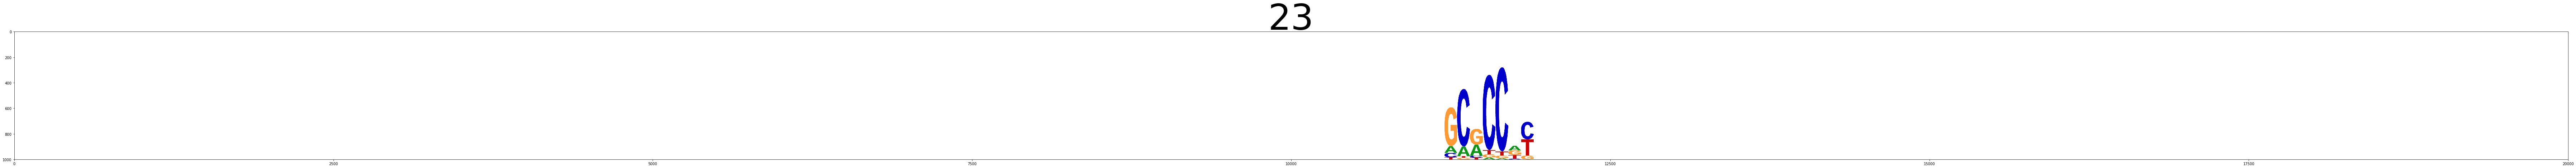

In [6]:
# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

saliency = []
for neuron_index in range(24):
    val = helper.backprop(X, layer='conv1d_0_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)
    
    plt.figure(figsize=(100,10))
    pwm = utils.normalize_pwm(np.squeeze(val[0]).T, factor=3)
    logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
    plt.imshow(logo)
    plt.title(str(neuron_index), fontsize=100)

In [ ]:
# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }


active_indices = [8, 9, 17, 21]
num_plots = len(active_indices)

saliency = []
for neuron_index in active_indices:
    val = helper.backprop(X, layer='conv1d_0_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)
    

    
fig = plt.figure(figsize=(100,10))
plt.subplot(num_plots,1,1)
pwm = utils.normalize_pwm(np.squeeze(saliency[0]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[0]), fontsize=70)

plt.subplot(num_plots,1,2)
pwm = utils.normalize_pwm(np.squeeze(saliency[1]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[1]), fontsize=70)

plt.subplot(num_plots,1,3)
pwm = utils.normalize_pwm(np.squeeze(saliency[2]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[2]), fontsize=70)


plt.subplot(num_plots,1,4)
pwm = utils.normalize_pwm(np.squeeze(saliency[3]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[3]), fontsize=70)

save_path = utils.make_directory(results_path, 'layers')
outfile = os.path.join(save_path,model_name+'_layer1.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
        

In [29]:
#active_indices = [2, 7, 13, 17]
active_indices = [1,2,11,23]


INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


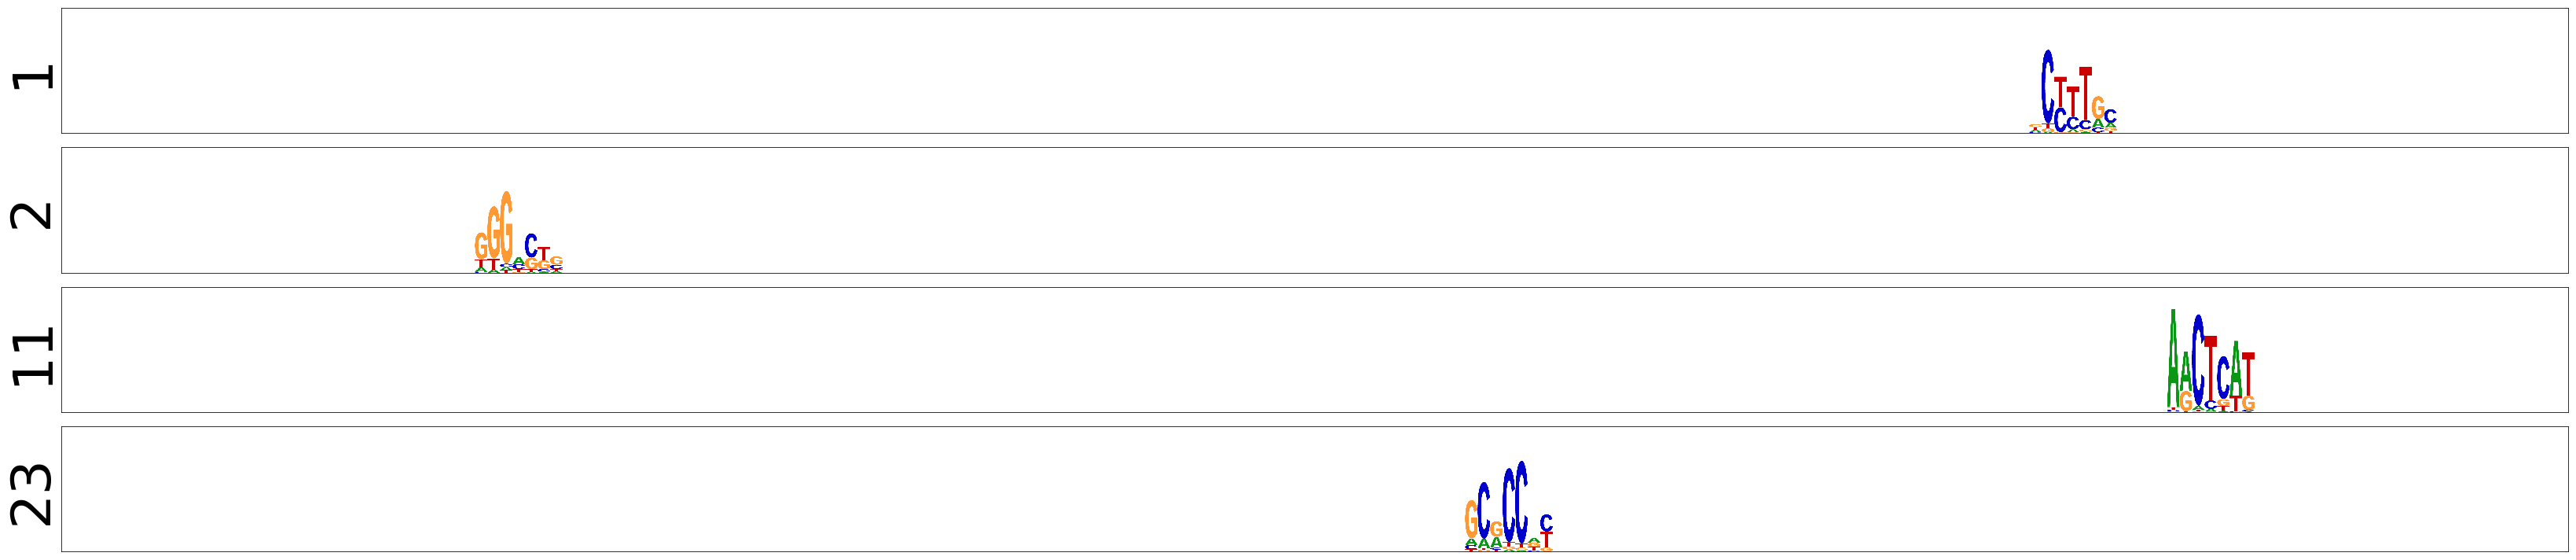

In [30]:
# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

saliency = []
for neuron_index in active_indices:
    val = helper.backprop(X, layer='conv1d_0_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)
    
num_plots = len(active_indices)
    
fig = plt.figure(figsize=(100,10))
plt.subplot(num_plots,1,1)
pwm = utils.normalize_pwm(np.squeeze(saliency[0]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[0]), fontsize=70)

plt.subplot(num_plots,1,2)
pwm = utils.normalize_pwm(np.squeeze(saliency[1]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[1]), fontsize=70)

plt.subplot(num_plots,1,3)
pwm = utils.normalize_pwm(np.squeeze(saliency[2]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[2]), fontsize=70)


plt.subplot(num_plots,1,4)
pwm = utils.normalize_pwm(np.squeeze(saliency[3]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[3]), fontsize=70)

save_path = utils.make_directory(results_path, 'layers')
outfile = os.path.join(save_path,model_name+'_layer1_2.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
        

# Layer 2

In [10]:
nnmodel.inspect_layers()

----------------------------------------------------------------------------
Network architecture:
----------------------------------------------------------------------------
layer1: inputs
(?, 200, 1, 4)
layer2: conv1d_0
(?, 200, 1, 24)
layer3: conv1d_0_batch
(?, 200, 1, 24)
layer4: conv1d_0_active
(?, 200, 1, 24)
layer5: conv1d_0_dropout
(?, 200, 1, 24)
layer6: conv1d_1
(?, 195, 1, 32)
layer7: conv1d_1_batch
(?, 195, 1, 32)
layer8: conv1d_1_active
(?, 195, 1, 32)
layer9: conv1d_1_maxpool
(?, 65, 1, 32)
layer10: conv1d_1_dropout
(?, 65, 1, 32)
layer11: conv1d_2
(?, 60, 1, 48)
layer12: conv1d_2_batch
(?, 60, 1, 48)
layer13: conv1d_2_active
(?, 60, 1, 48)
layer14: conv1d_2_maxpool
(?, 15, 1, 48)
layer15: conv1d_2_dropout
(?, 15, 1, 48)
layer16: conv1d_3
(?, 12, 1, 64)
layer17: conv1d_3_batch
(?, 12, 1, 64)
layer18: conv1d_3_active
(?, 12, 1, 64)
layer19: conv1d_3_maxpool
(?, 4, 1, 64)
layer20: conv1d_3_dropout
(?, 4, 1, 64)
layer21: conv1d_4
(?, 1, 1, 96)
layer22: conv1d_4_batch
(?, 1,

In [11]:
tf.reset_default_graph()

model_name = 'DistNet'
dropout_status = True
l2_status = True
bn_status = True

# model save path
    
# load model parameters
model_layers, optimization, genome_model = helper.load_model(model_name, input_shape, output_shape,
                                               dropout_status, l2_status, bn_status)

# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=True)

# compile neural trainers
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')
nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

# initialize session
sess = utils.initialize_session()

# load best parameters
nntrainer.set_best_parameters(sess)

activations = nntrainer.get_activations(sess, {'inputs': X}, layer='conv1d_1_active')

loading model from:  ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


In [12]:
active_indices = np.argsort(np.max(np.squeeze(activations), axis=0))[::-1]

INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_

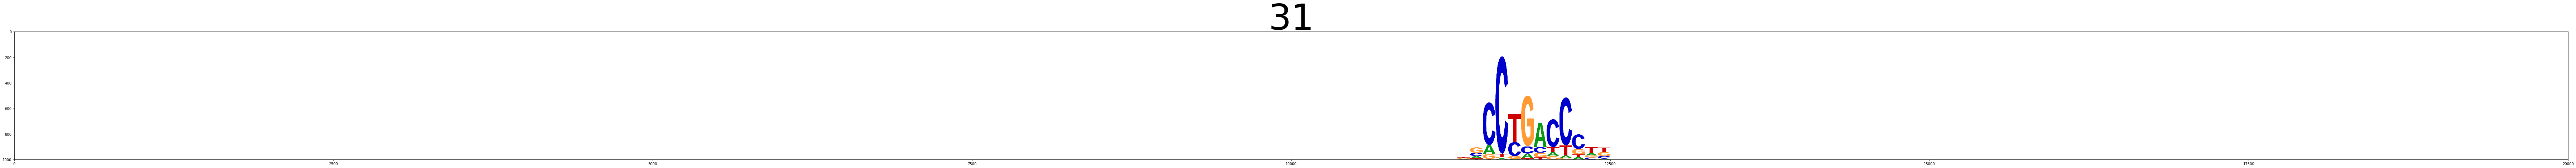

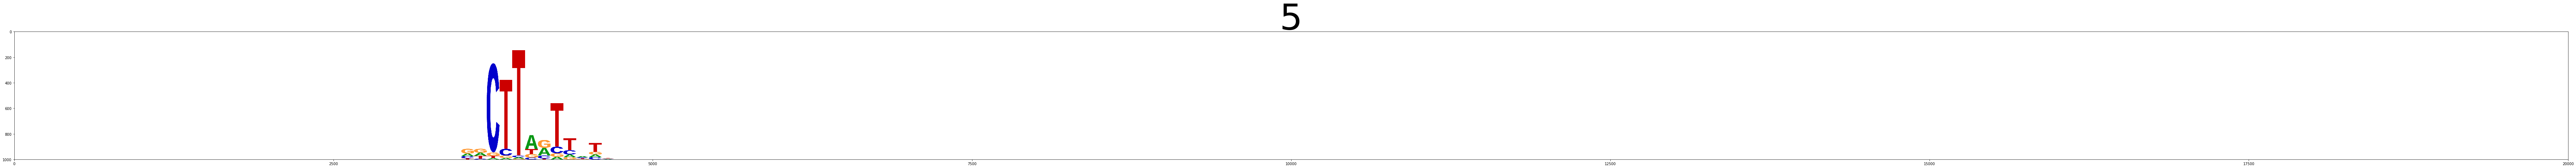

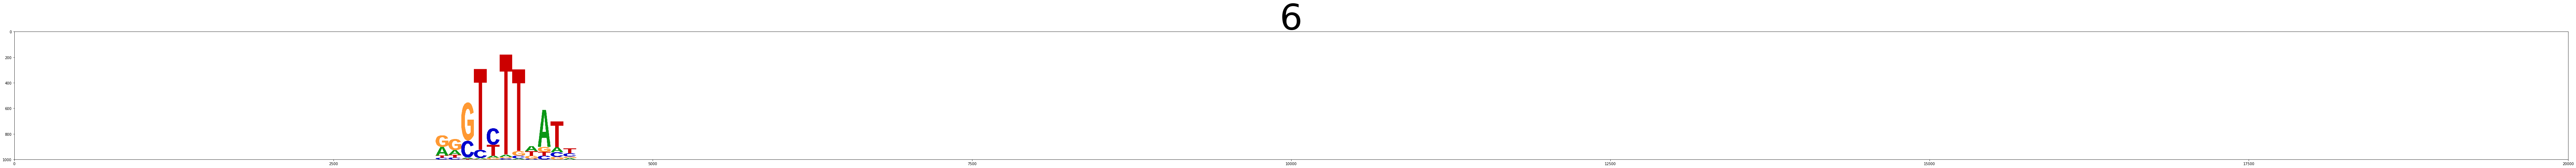

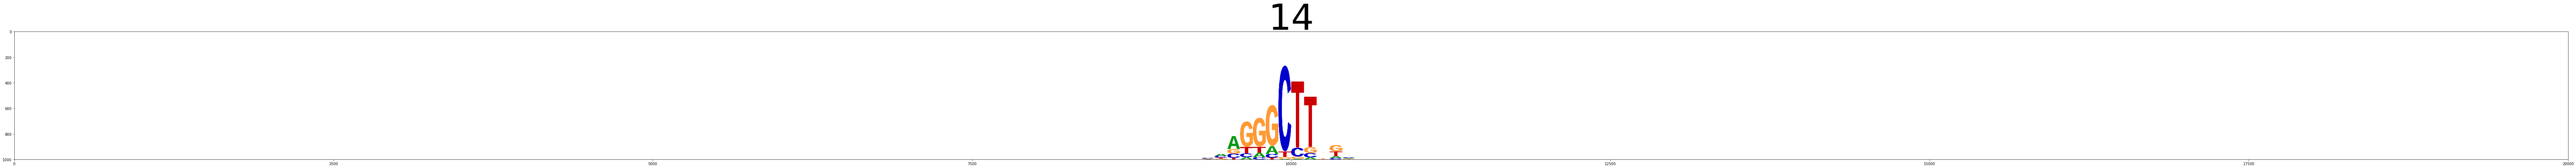

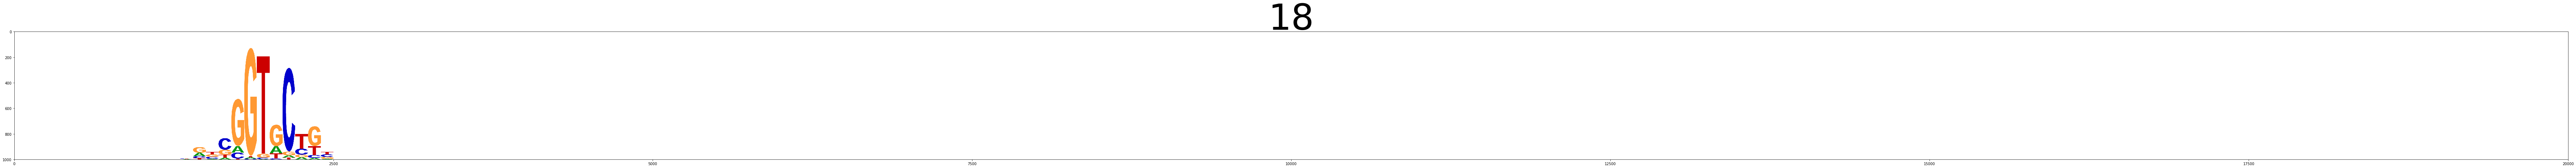

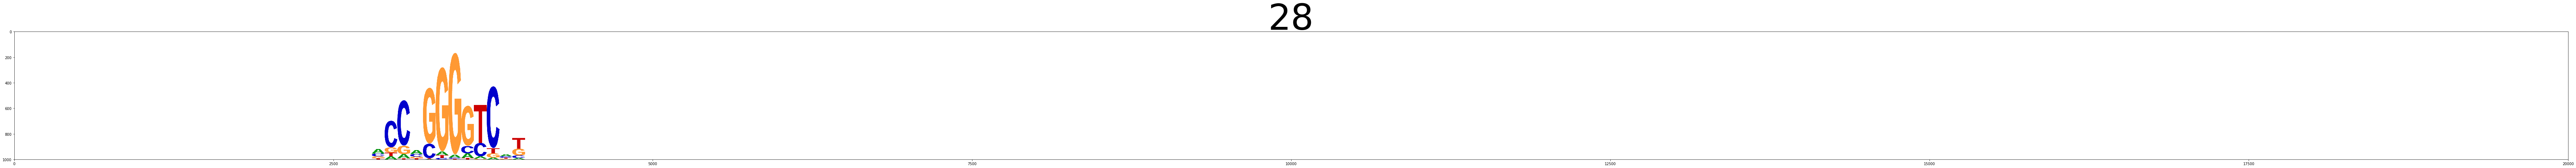

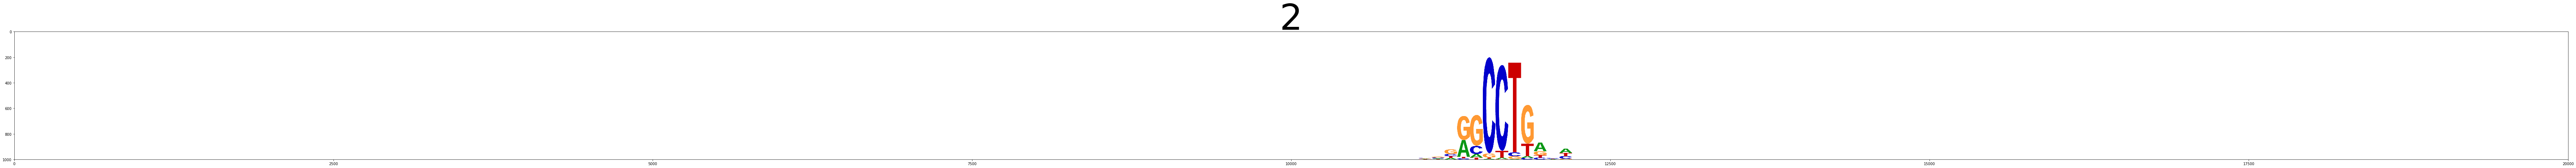

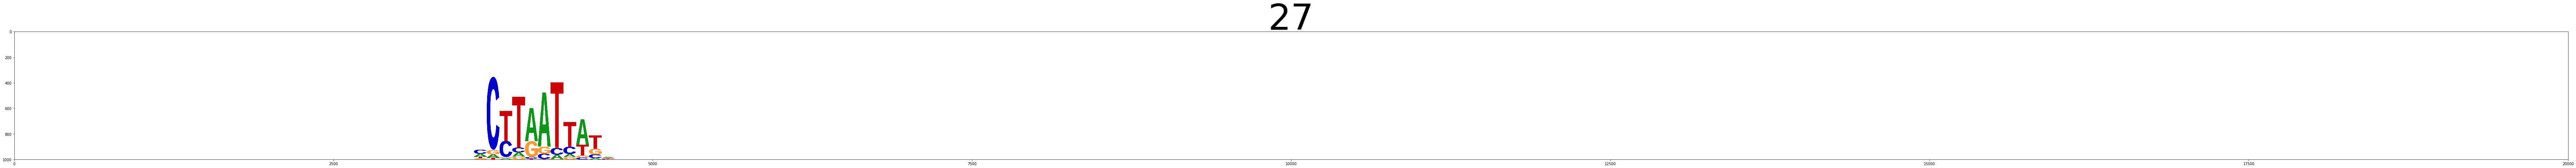

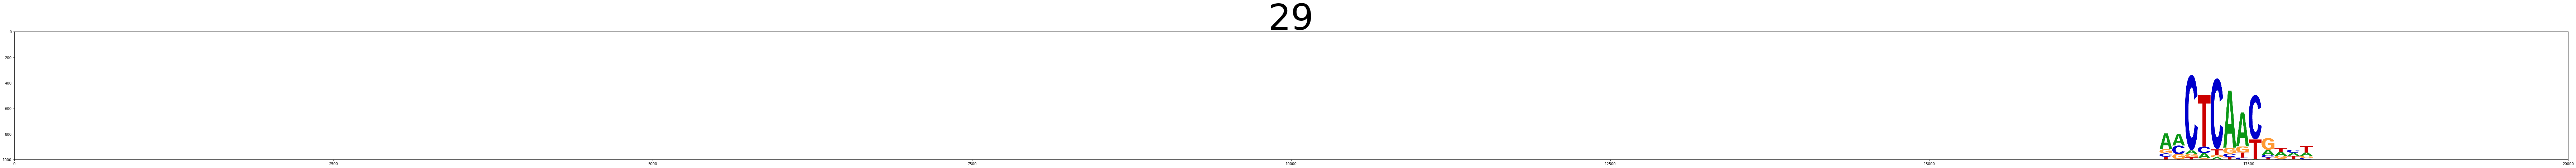

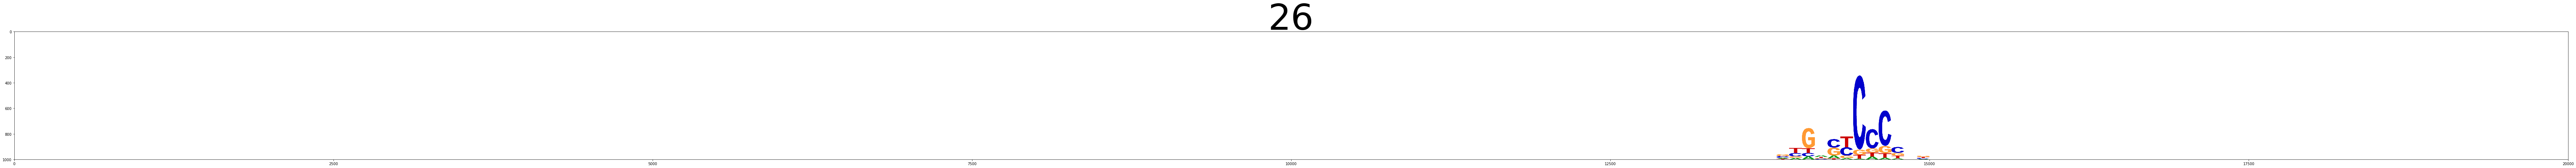

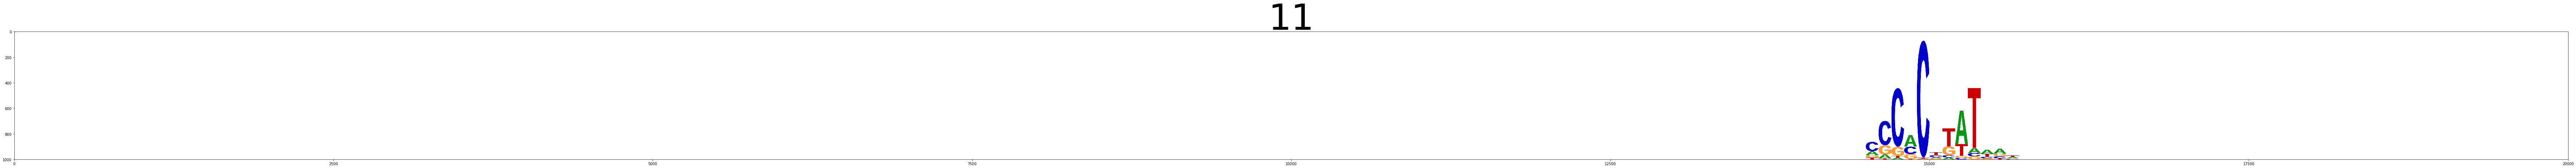

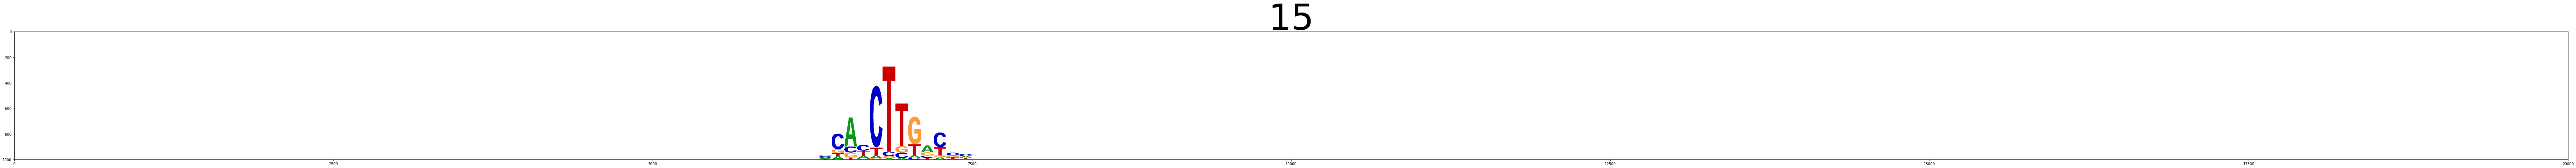

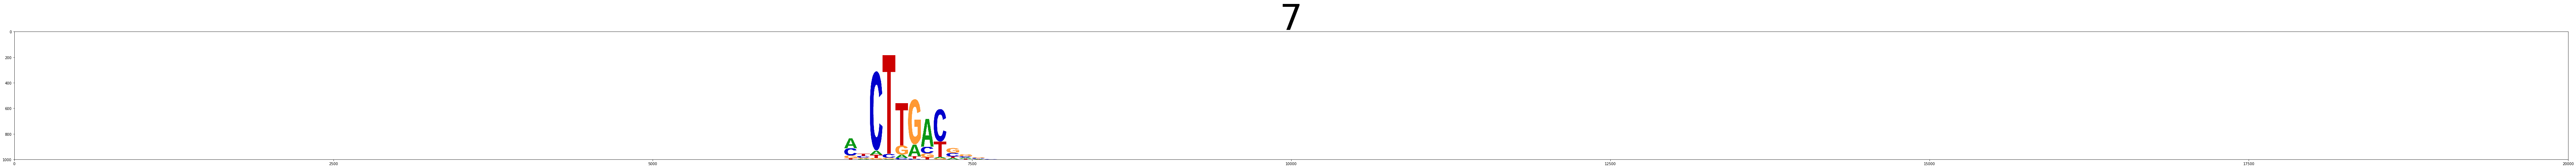

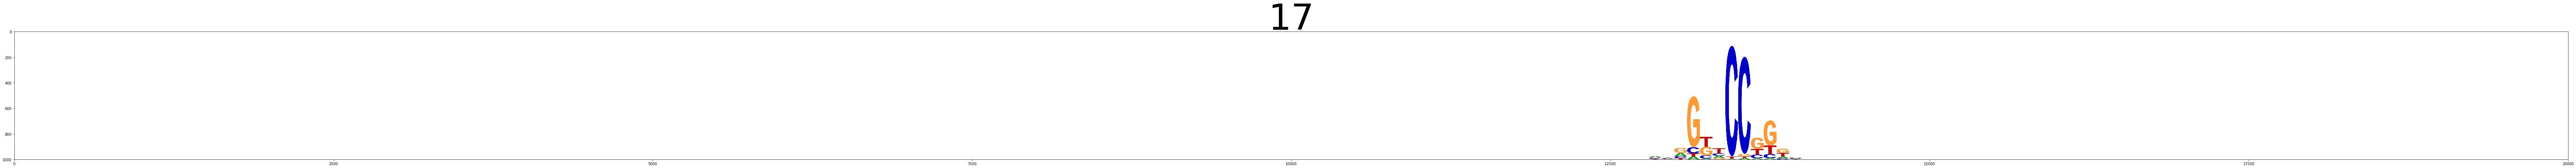

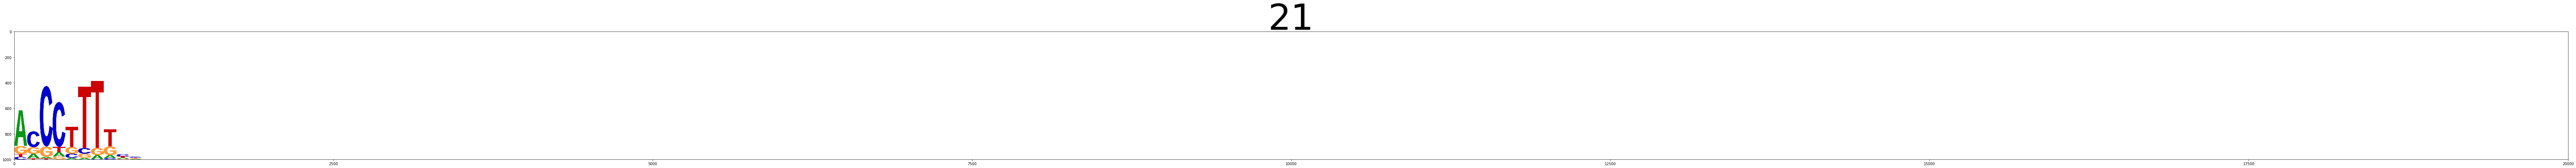

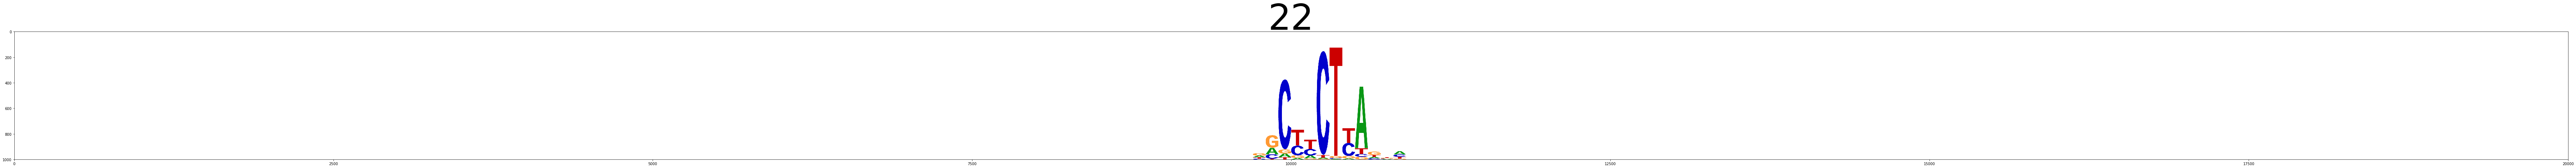

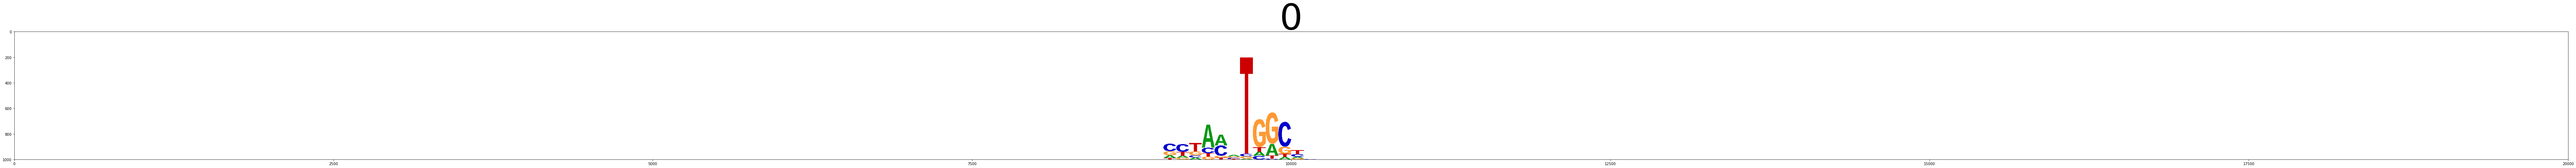

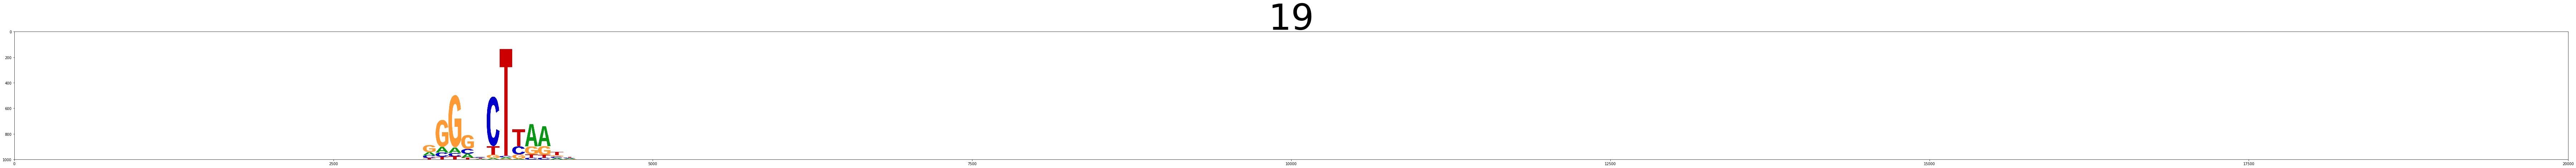

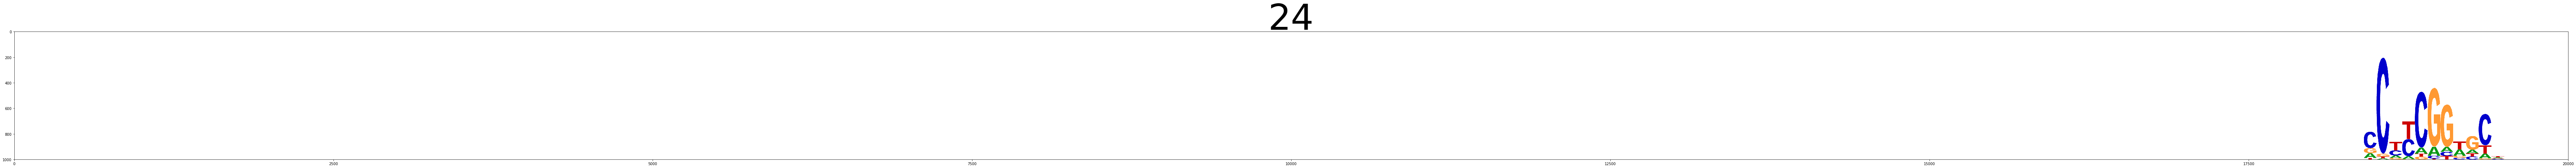

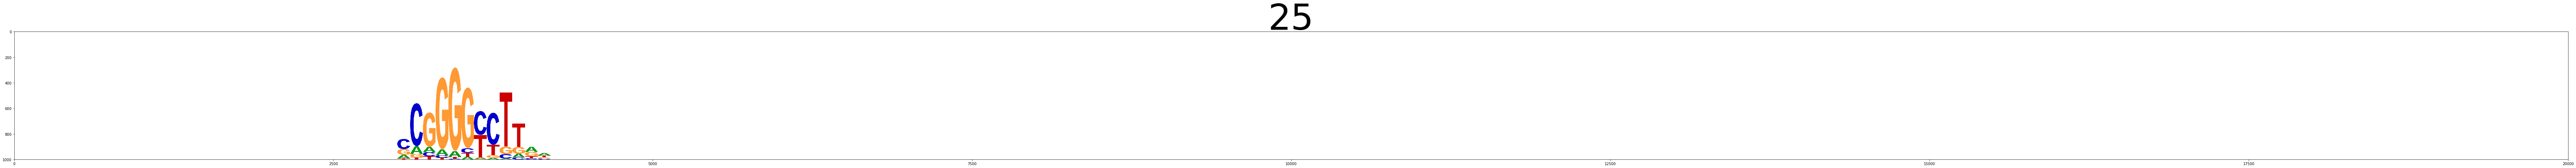

In [13]:
# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

saliency = []
for neuron_index in active_indices[:20]:
    val = helper.backprop(X, layer='conv1d_1_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)
    
    plt.figure(figsize=(100,10))
    pwm = utils.normalize_pwm(np.squeeze(val[0]).T, factor=3)
    logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
    plt.imshow(logo)
    plt.title(str(neuron_index), fontsize=100)


In [31]:
active_indices = [12,7,14,8]

saliency = []
for neuron_index in active_indices:
    val = helper.backprop(X, layer='conv1d_1_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)

INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


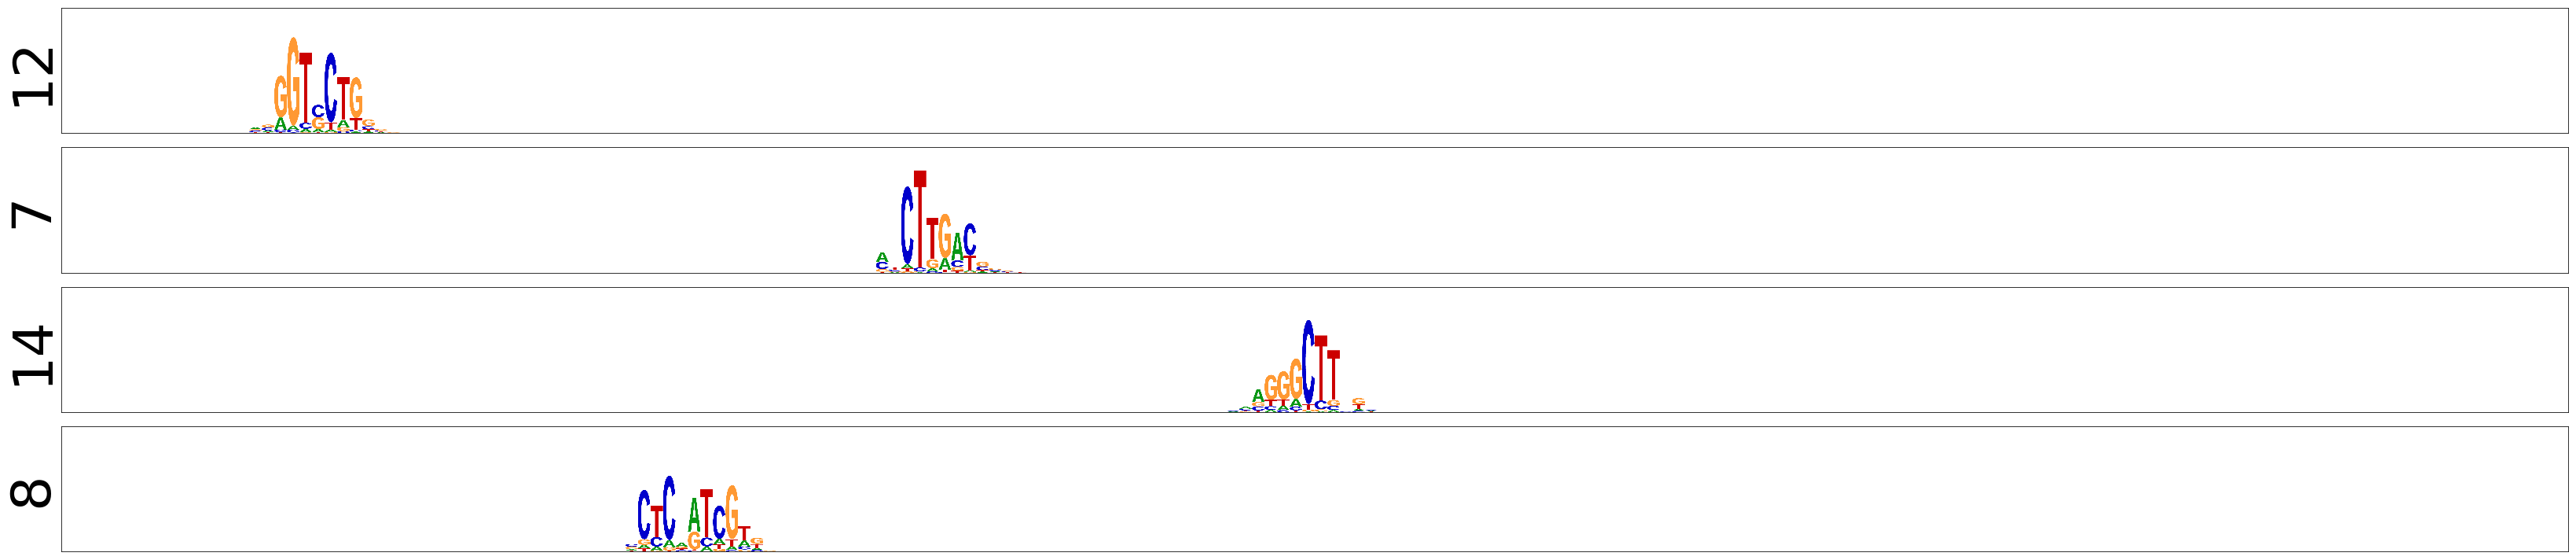

In [32]:
fig = plt.figure(figsize=(100,10))
plt.subplot(num_plots,1,1)
pwm = utils.normalize_pwm(np.squeeze(saliency[0]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[0]), fontsize=70)

plt.subplot(num_plots,1,2)
pwm = utils.normalize_pwm(np.squeeze(saliency[1]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[1]), fontsize=70)

plt.subplot(num_plots,1,3)
pwm = utils.normalize_pwm(np.squeeze(saliency[2]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[2]), fontsize=70)


plt.subplot(num_plots,1,4)
pwm = utils.normalize_pwm(np.squeeze(saliency[3]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[3]), fontsize=70)

save_path = utils.make_directory(results_path, 'layers')
outfile = os.path.join(save_path,model_name+'_layer2.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
        

# Layer 3

In [17]:
tf.reset_default_graph()

model_name = 'DistNet'
dropout_status = True
l2_status = True
bn_status = True

# model save path
    
# load model parameters
model_layers, optimization, genome_model = helper.load_model(model_name, input_shape, output_shape,
                                               dropout_status, l2_status, bn_status)

# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=True)

# compile neural trainers
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')
nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

# initialize session
sess = utils.initialize_session()

# load best parameters
nntrainer.set_best_parameters(sess)

activations = nntrainer.get_activations(sess, {'inputs': X}, layer='conv1d_2_active')

loading model from:  ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


In [18]:
active_indices = np.argsort(np.max(np.squeeze(activations), axis=0))[::-1]

In [ ]:
# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

saliency = []
for neuron_index in active_indices[20:30]:
    val = helper.backprop(X, layer='conv1d_2_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)
    
    plt.figure(figsize=(100,10))
    pwm = utils.normalize_pwm(np.squeeze(val[0]).T, factor=3)
    logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
    plt.imshow(logo)
    plt.title(str(neuron_index), fontsize=100)


In [33]:
active_indices = [10,40,31,30]

saliency = []
for neuron_index in active_indices:
    val = helper.backprop(X, layer='conv1d_2_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)

INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


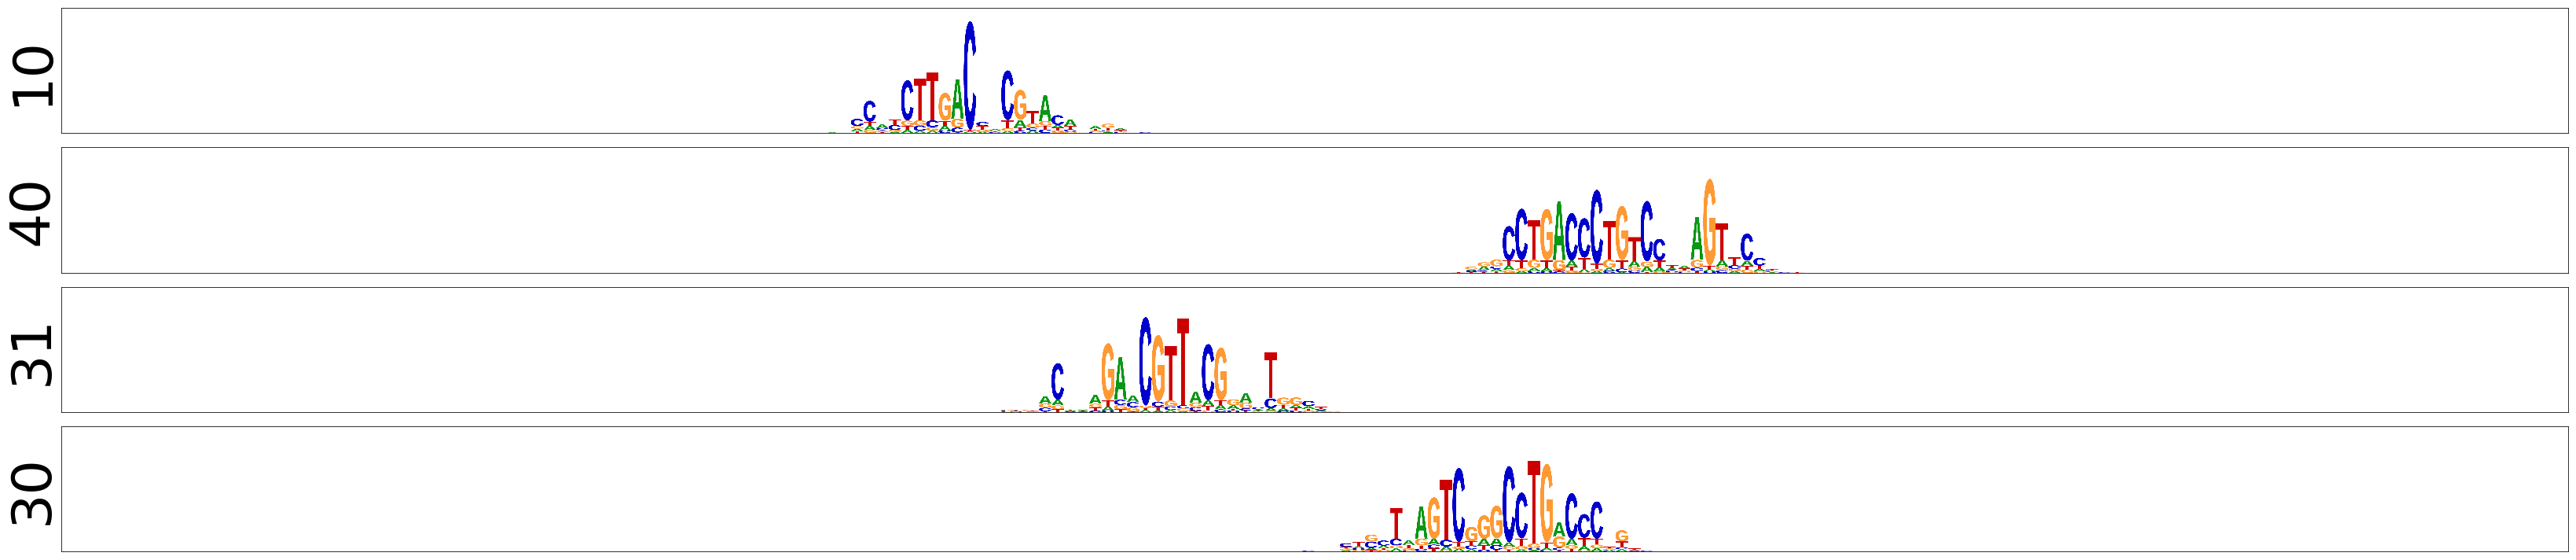

In [34]:
fig = plt.figure(figsize=(100,10))
plt.subplot(num_plots,1,1)
pwm = utils.normalize_pwm(np.squeeze(saliency[0]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[0]), fontsize=70)

plt.subplot(num_plots,1,2)
pwm = utils.normalize_pwm(np.squeeze(saliency[1]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[1]), fontsize=70)

plt.subplot(num_plots,1,3)
pwm = utils.normalize_pwm(np.squeeze(saliency[2]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[2]), fontsize=70)


plt.subplot(num_plots,1,4)
pwm = utils.normalize_pwm(np.squeeze(saliency[3]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[3]), fontsize=70)

save_path = utils.make_directory(results_path, 'layers')
outfile = os.path.join(save_path,model_name+'_layer3.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
        

# layer 4

In [22]:
tf.reset_default_graph()

model_name = 'DistNet'
dropout_status = True
l2_status = True
bn_status = True

# model save path
    
# load model parameters
model_layers, optimization, genome_model = helper.load_model(model_name, input_shape, output_shape,
                                               dropout_status, l2_status, bn_status)

# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=True)

# compile neural trainers
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')
nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

# initialize session
sess = utils.initialize_session()

# load best parameters
nntrainer.set_best_parameters(sess)

activations = nntrainer.get_activations(sess, {'inputs': X}, layer='conv1d_3_active')

loading model from:  ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


In [ ]:
active_indices = np.argsort(np.max(np.squeeze(activations), axis=0))[::-1]

In [ ]:
# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

saliency = []
for neuron_index in active_indices[40:60]:
    val = helper.backprop(X, layer='conv1d_3_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)
    
    plt.figure(figsize=(100,10))
    pwm = utils.normalize_pwm(np.squeeze(val[0]).T, factor=3)
    logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
    plt.imshow(logo)
    plt.title(str(neuron_index), fontsize=100)


In [35]:
active_indices = [6,33,47,63]

params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

saliency = []
for neuron_index in active_indices:
    val = helper.backprop(X, layer='conv1d_3_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)

INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


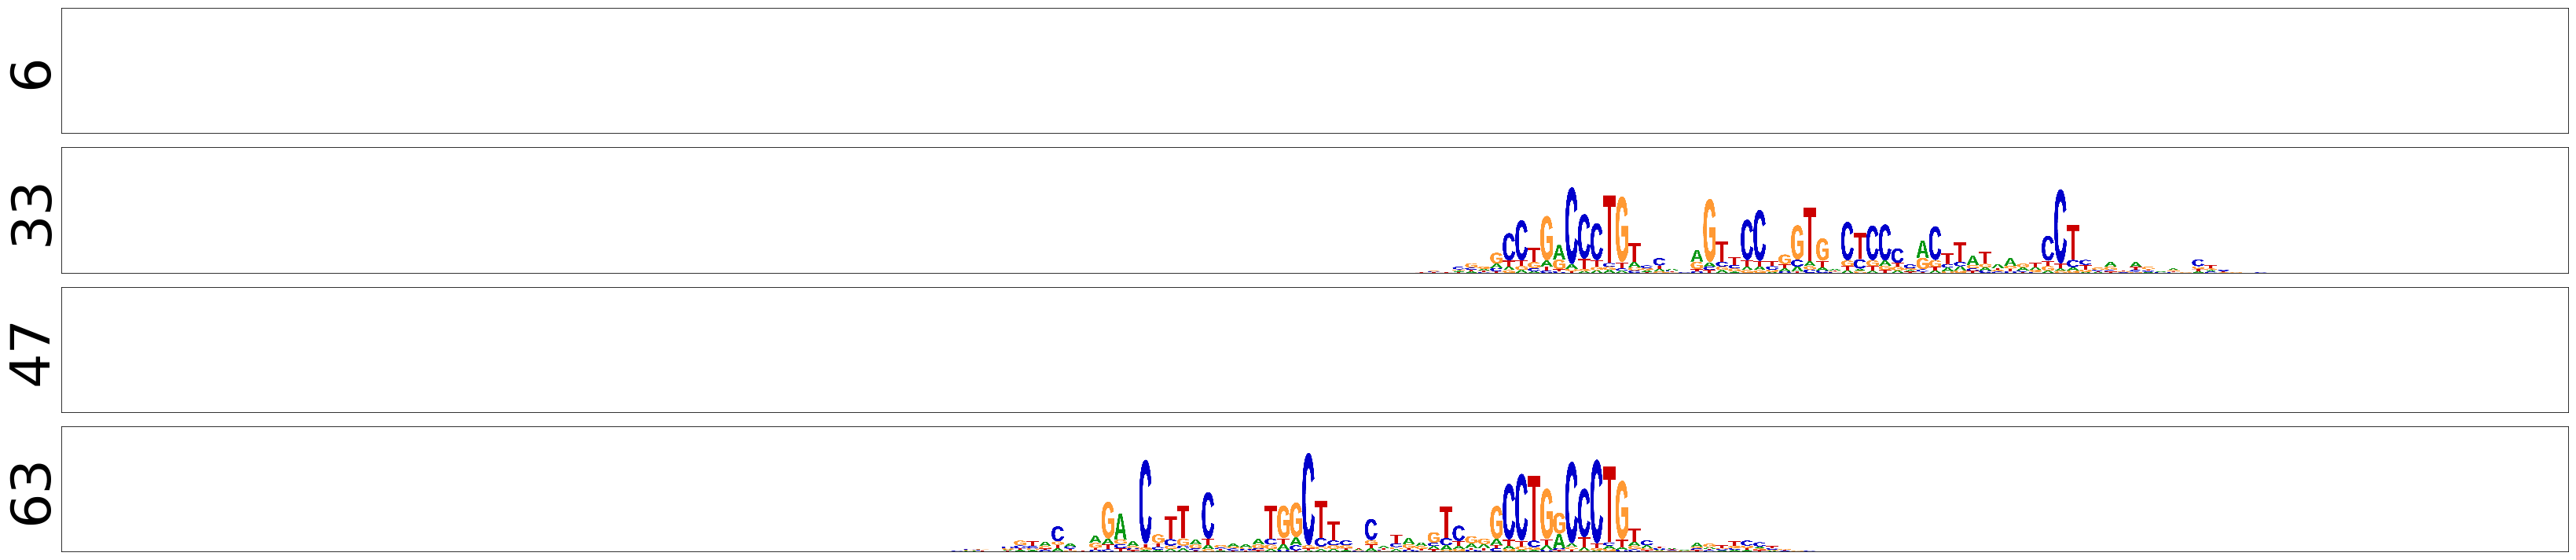

In [36]:
fig = plt.figure(figsize=(100,10))
plt.subplot(num_plots,1,1)
pwm = utils.normalize_pwm(np.squeeze(saliency[0]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[0]), fontsize=70)

plt.subplot(num_plots,1,2)
pwm = utils.normalize_pwm(np.squeeze(saliency[1]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[1]), fontsize=70)

plt.subplot(num_plots,1,3)
pwm = utils.normalize_pwm(np.squeeze(saliency[2]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[2]), fontsize=70)


plt.subplot(num_plots,1,4)
pwm = utils.normalize_pwm(np.squeeze(saliency[3]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[3]), fontsize=70)

save_path = utils.make_directory(results_path, 'layers')
outfile = os.path.join(save_path,model_name+'_layer4.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
        

# layer 5

In [25]:
tf.reset_default_graph()

model_name = 'DistNet'
dropout_status = True
l2_status = True
bn_status = True

# model save path
    
# load model parameters
model_layers, optimization, genome_model = helper.load_model(model_name, input_shape, output_shape,
                                               dropout_status, l2_status, bn_status)

# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=True)

# compile neural trainers
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')
nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

# initialize session
sess = utils.initialize_session()

# load best parameters
nntrainer.set_best_parameters(sess)

activations = nntrainer.get_activations(sess, {'inputs': X}, layer='conv1d_4_active')

loading model from:  ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


In [ ]:
active_indices = np.argsort(np.squeeze(activations))[::-1]

In [ ]:
# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

saliency = []
for neuron_index in active_indices[0:20]:
    val = helper.backprop(X, layer='conv1d_4_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)
    
    plt.figure(figsize=(100,10))
    pwm = utils.normalize_pwm(np.squeeze(val[0]).T, factor=3)
    logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
    plt.imshow(logo)
    plt.title(str(neuron_index), fontsize=100)


In [37]:
active_indices = [9,23,60,85]

params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

saliency = []
for neuron_index in active_indices:
    val = helper.backprop(X, layer='conv1d_4_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)

INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/model_params/DistNet/DistNet_do_l2_bn_best.ckpt


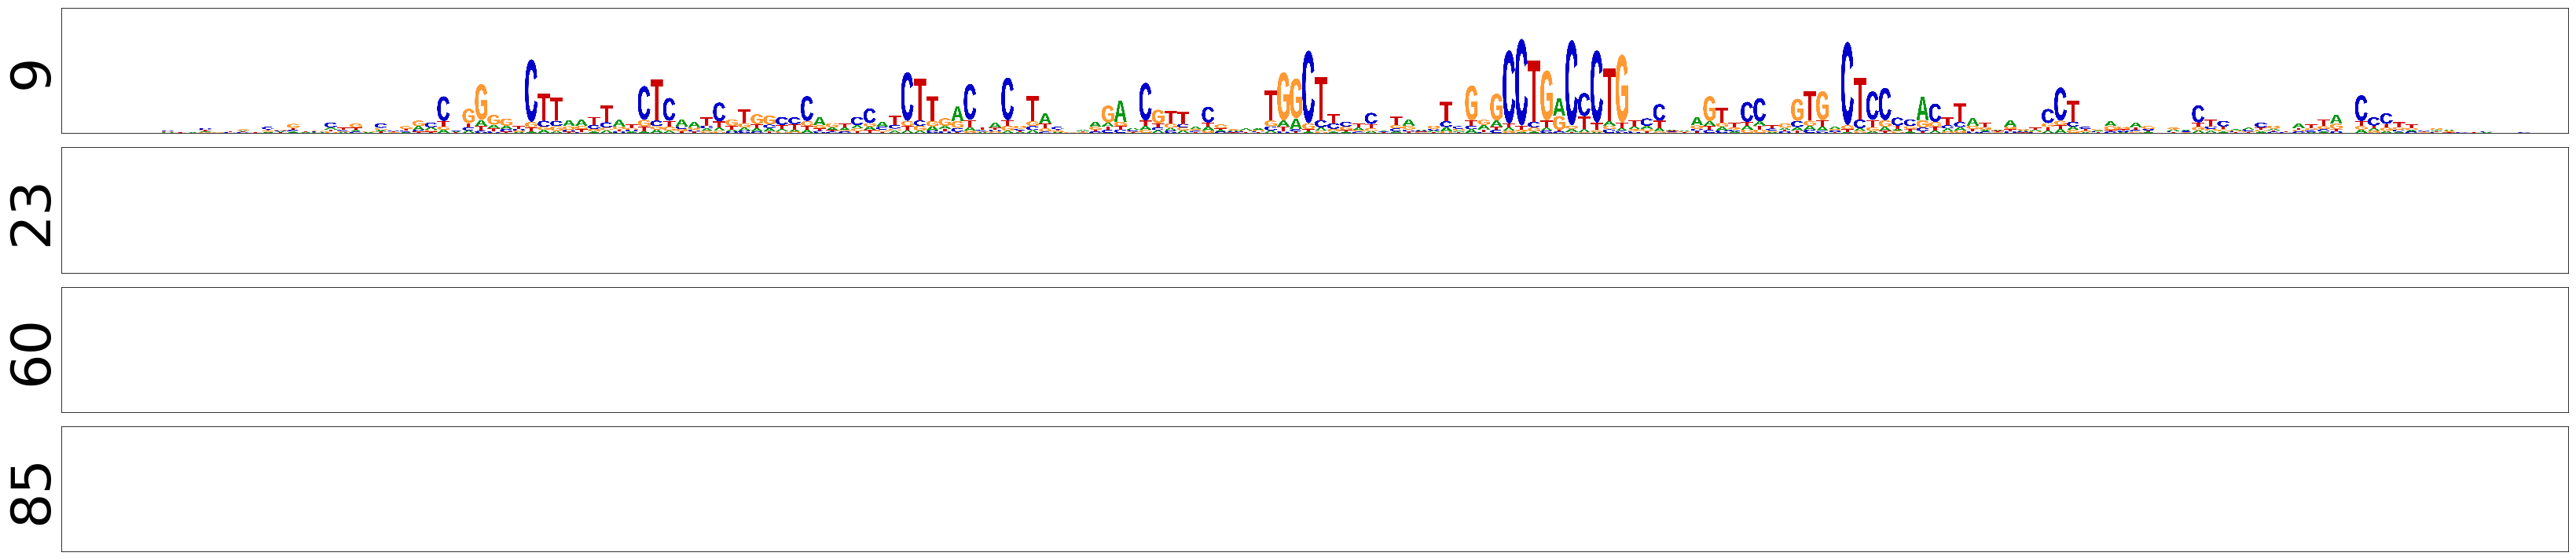

In [38]:
fig = plt.figure(figsize=(100,10))
plt.subplot(num_plots,1,1)
pwm = utils.normalize_pwm(np.squeeze(saliency[0]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[0]), fontsize=70)

plt.subplot(num_plots,1,2)
pwm = utils.normalize_pwm(np.squeeze(saliency[1]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[1]), fontsize=70)

plt.subplot(num_plots,1,3)
pwm = utils.normalize_pwm(np.squeeze(saliency[2]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[2]), fontsize=70)


plt.subplot(num_plots,1,4)
pwm = utils.normalize_pwm(np.squeeze(saliency[3]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel(str(active_indices[3]), fontsize=70)

save_path = utils.make_directory(results_path, 'layers')
outfile = os.path.join(save_path,model_name+'_layer5.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
        

# Output layer

In [ ]:
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')

# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape,  
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

fig = plt.figure(figsize=(100,2))
guided_saliency = helper.backprop(X, layer='output', class_index=0, params=params, method='guided')

pwm = utils.normalize_pwm(np.squeeze(guided_saliency[0]).T, factor=3)
logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
plt.imshow(logo)
plt.xticks([])
plt.yticks([])
plt.ylabel('Output', fontsize=38)

save_path = utils.make_directory(results_path, 'layers')
outfile = os.path.join(save_path,model_name+'_output.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(100,4))
visualize.plot_seq_pos_saliency(np.squeeze(X).T, X_model, alphabet='dna', nt_width=50, norm_factor=3)
save_path = utils.make_directory(results_path, 'layers')
outfile = os.path.join(save_path,model_name+'_model.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
